# Assignment on Classification

## 1. Read Dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading and viewing the dataset
data = pd.read_excel("D:\Data\CSV\iris_classi.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# basic details of dataset
# summary statistics
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# shape
data.shape

(150, 5)

In [7]:
# datatypes
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

## 2. Necessary Preprocessing

### Find missing values

In [8]:
# check the missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

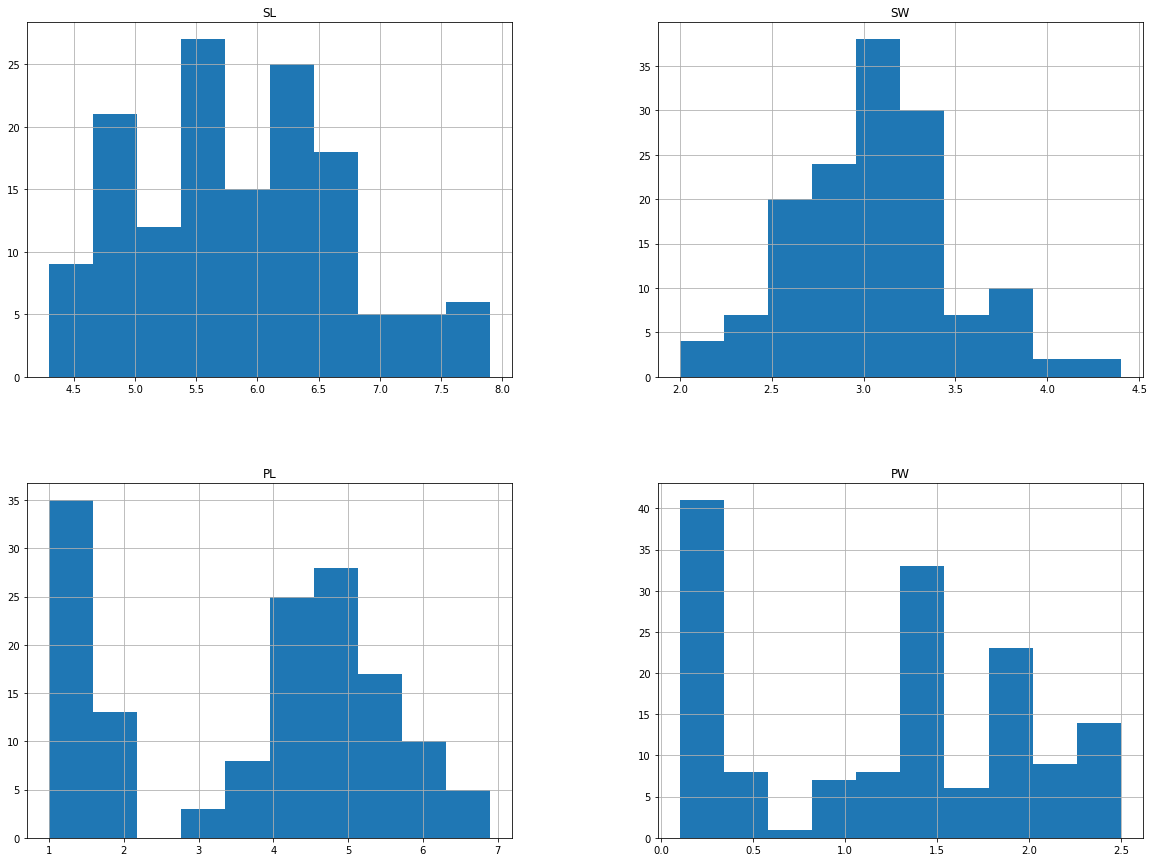

In [9]:
# Plot a Bar graph of all float data type 
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [10]:
# to fill all the missing values
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
# we can fill all the missing values of SL, SW and PL using median 
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].median())

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Managing Outliers

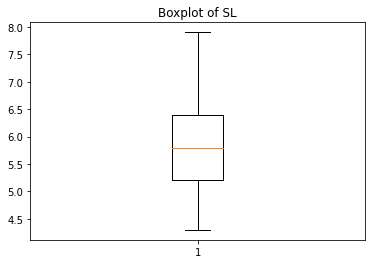

In [13]:
# boxplot for SL
plt.boxplot(data['SL'])
plt.title('Boxplot of SL');

In [14]:
# no visible outliers from boxplot

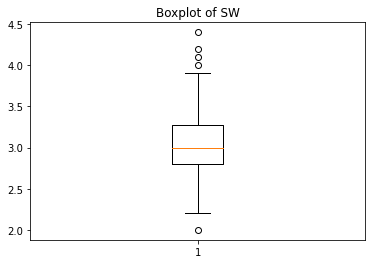

In [15]:
# boxplot for SW
plt.boxplot(data['SW'])
plt.title('Boxplot of SW');

In [16]:
# presence of outliers from boxplot

In [17]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [18]:
data['SW'].median()

3.0

In [19]:
# inter quartile range
IQR = Q3-Q1
IQR

0.4500000000000002

In [20]:
# upper and lower limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [21]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print(outlier)        

[4.0, 4.4, 4.1, 4.2, 2.0]


In [22]:
# 1 outlier is less than lower limit and 4 outliers are greater than upper limit

In [23]:
# outliers are not removed

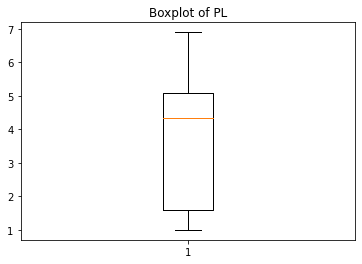

In [24]:
# boxplot for PL
plt.boxplot(data['PL'])
plt.title('Boxplot of PL');

In [25]:
# no visible outliers from boxplot

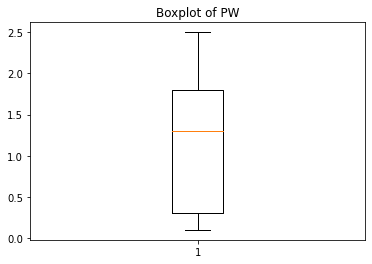

In [26]:
# boxplot for PW
plt.boxplot(data['PW'])
plt.title('Boxplot of PW');

In [27]:
# no vible outliers from boxplot

### Label Encode

In [28]:
# take Classification column as target

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [31]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


## 3. Models

### Model 1 - Logistic Regression

In [32]:
# separating columns into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# creating Logistic Regression model
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train,y_train)
y_pred_logit = logit_model.predict(X_test)

C:\Users\HP\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
y_pred_logit

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
# confusion matrix
confusion_matrix(y_test, y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [39]:
# Find accuracy
accuracy_score(y_test, y_pred_logit)

1.0

#### Accuracy of Logistic Regression - 100 %

### Model 2 - kNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# to find the desired k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

In [42]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

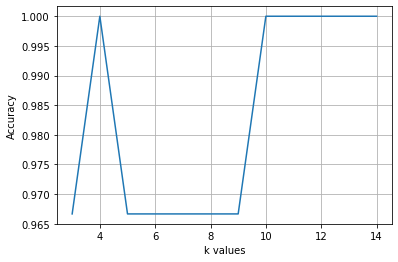

In [43]:
plt.plot(neighbors, metric_k)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid();

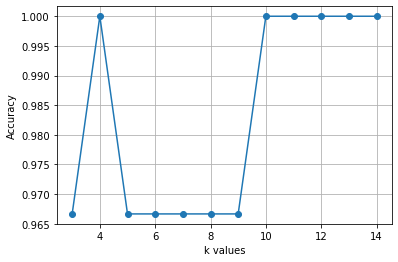

In [44]:
# plot k values vs accuracy
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid();

In [45]:
# model creation
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [46]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [47]:
# Find accuracy
accuracy_score(y_test, y_pred_kNN)

0.9666666666666667

#### Accuracy of kNN - 96% (neighbors=5)

In [48]:
# model creation
classifier = KNeighborsClassifier(n_neighbors=7)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [49]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [50]:
# Find accuracy
accuracy_score(y_test, y_pred_kNN)

0.9666666666666667

#### Accuracy of kNN - 96 % (neighbors=7)

### Model 3 - SVM 

#### SVM Linear Kernel

In [51]:
from sklearn.svm import SVC

In [52]:
# create svm model  (with linear kernel)
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [53]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [54]:
# Find accuracy
accuracy_score(y_test, y_pred_svm)

1.0

#### Accuracy of SVM Linear model - 100 %

#### SVM Radial Basis Function Kernel

In [55]:
# create svm model (with radial basis function kernel)
svm_clf2 = SVC(kernel='rbf')
svm_clf2 = svm_clf2.fit(X_train, y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [56]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [57]:
# Find accuracy
accuracy_score(y_test, y_pred_svm2)

1.0

#### Accuracy SVM rbf model - 100 %

### Model 4 - Logistic Regression after Min Max Scaling

In [58]:
# separating columns into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [59]:
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [60]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

In [61]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [62]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X = min_max_scaler.fit_transform(X)

In [63]:
X = pd.DataFrame(X, columns=['SL', 'SW', 'PL', 'PW'])

In [64]:
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778
std,0.224602,0.175831,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [65]:
X

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.567797,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [66]:
# spliting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# creating Logistic Regression model
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train,y_train)
y_pred_logit = logit_model.predict(X_test)

In [68]:
# confusion matrix
confusion_matrix(y_test, y_pred_logit)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [69]:
# Find accuracy
accuracy_score(y_test, y_pred_logit)

0.9666666666666667

#### Accuracy of Logistic Regression after Minmax Scaling - 96 %

### Model 5 - kNN - After Minmax Scaling

In [70]:
# to find the desired k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

In [71]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

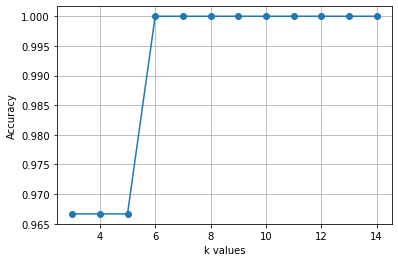

In [72]:
# plot k values vs accuracy
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid();

In [73]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [74]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [75]:
# Find accuracy
accuracy_score(y_test, y_pred_kNN)

0.9666666666666667

#### Accuracy of kNN after min max scaling - 96% (neighbors = 5)

In [76]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=7)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [77]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [78]:
# Find accuracy
accuracy_score(y_test, y_pred_kNN)

1.0

#### Accuracy of kNN after min max scaling - 100 % (neighbors = 7)¶

### Model 6 - SVM - After Minmax Scaling

#### SVM - Linear Kernel

In [79]:
# create svm model  (with linear kernel)
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [80]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [81]:
# Find accuracy
accuracy_score(y_test, y_pred_svm)

1.0

#### Accuracy of SVM Linear model after Min Max Scaling - 100 %

#### SVM Radial Basis Function Kernel

In [82]:
# create svm model (with radial basis function kernel)
svm_clf2 = SVC(kernel='rbf')
svm_clf2 = svm_clf2.fit(X_train, y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [83]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm2)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [84]:
# Find accuracy
accuracy_score(y_test, y_pred_svm2)

0.9666666666666667

#### Accuracy of SVM rbf Model after Min Max Scaling - 96%

### Model 7 - Logistic Regression after Standard Scaling

In [85]:
# separating columns into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Standard Scaling
std_scl = StandardScaler()
X = std_scl.fit_transform(X)

In [88]:
X = pd.DataFrame(X, columns=['SL', 'SW', 'PL', 'PW'])

In [89]:
X.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.566381e-16,-9.695948e-17,1.421085e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.927530e+00,-2.490174e+00,-1.612857e+00,-1.444450e+00
25%,-8.107207e-01,-5.880679e-01,-1.264758e+00,-1.181504e+00
50%,-6.618128e-02,-1.125413e-01,3.306937e-01,1.332259e-01
75%,6.783581e-01,5.413078e-01,7.658171e-01,7.905908e-01
max,2.539707e+00,3.216145e+00,1.810113e+00,1.710902e+00


In [90]:
# spliting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# creating Logistic Regression model
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train,y_train)
y_pred_logit = logit_model.predict(X_test)

In [92]:
# confusion matrix
confusion_matrix(y_test, y_pred_logit)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [93]:
# Find accuracy
accuracy_score(y_test, y_pred_logit)

0.9666666666666667

#### Accuracy of Logistic Regression after Standard Scaling - 96%

### Model 8 - kNN after Standard Scaling

In [94]:
# to find the desired k value
metric_k = []
neighbors = range(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)

In [95]:
metric_k

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

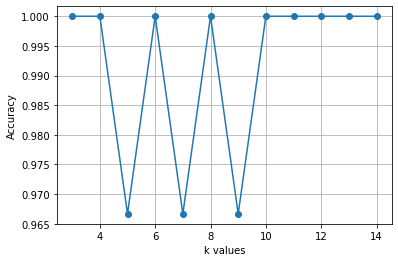

In [96]:
# plot k values vs accuracy
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid();

In [97]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [98]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [99]:
# Find accuracy
accuracy_score(y_test, y_pred_kNN)

0.9666666666666667

#### Accuracy of kNN after standard scaling - 96 % (neighbors = 5)

In [100]:
# creating model
classifier = KNeighborsClassifier(n_neighbors=7)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [101]:
# confusion matrix
confusion_matrix(y_test, y_pred_kNN)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [102]:
# Find accuracy
accuracy_score(y_test, y_pred_kNN)

0.9666666666666667

#### Accuracy of kNN after Standard Scaling - 96 % (neighbors = 7)

### Model 9 - SVM after Standard Scaling

#### SVM Linear Kernel

In [103]:
# create svm model  (with linear kernel)
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [104]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [105]:
# Find accuracy
accuracy_score(y_test, y_pred_svm)

0.9666666666666667

#### Accuracy of SVM Linear Model after Standard Scaling - 96 %

#### SVM Radal Basis Function Kernel

In [106]:
# create svm model (with radial basis function kernel)
svm_clf2 = SVC(kernel='rbf')
svm_clf2 = svm_clf2.fit(X_train, y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [107]:
# confusion matrix
confusion_matrix(y_test, y_pred_svm2)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [108]:
# Find accuracy
accuracy_score(y_test, y_pred_svm2)

0.9666666666666667

#### Accuracy of SVM rbf after standard scaling - 96%

### Model 10 - Decision Tree

In [109]:
# separating columns into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
# create decision tree model
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [113]:
# confusion matrix
confusion_matrix(y_test, y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [114]:
# Find accuracy
accuracy_score(y_test, y_pred_dt)

1.0

#### Accuracy of Decision Tree Algorithm - 100 %

### Model 11 - Random Forest

In [115]:
# separating columns into feature and target
X = data.drop('Classification', axis=1)
y = data['Classification']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
# create random forest model
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

In [119]:
# confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [120]:
# Find accuracy
accuracy_score(y_test, y_pred_rf)

1.0

#### Accuracy of Random forest - 100 %

### Model 1 - Accuracy of Logistic Regression - 100 %
### Model 2 - Accuracy of kNN - 96% (neighbors=5),      96% (neighbors=7)
### Model 3 - Accuracy of SVM Linear model - 100 %,     SVM rbf model - 100 %

### After Min Max Scaling

### Model 4 - Logistic Regression -  96 %
### Model 5 - kNN - 96 % (neighbors=5),  100% (neighbors=7)
### Model 6 - SVM Linear Model - 100 % ,  SVM rbf Model - 96 %

### After Standard Scaling

### Model 7 - Logistic Regression - 96 %
### Model 8 - kNN - 96 % (neighbors=5),  96 % (neighbors=7)
### Model 9 - SVM Linear Model - 96 %,  SVM rbf Model - 96 %

### Model 10 - Decision Tree - 100 %
### Model 11 - Random Forest - 100 %

## Conclusion

### All the models except kNN model shows 100 % accuracy without scaling or removing the outliers. kNN model shows 100 % accuracy after min max scaling and taking k value as 7